In [1]:
from utils import *
import pytest 
import os
from scipy.stats import normaltest

import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [10]:
call_class = read_Ariel_dataset(noisy_path_train="./Example_data/noisy_train",
        noisy_path_test="./Example_data/noisy_test",
        params_path="./Example_data/params_train", start_read=30)

df = call_class.yeo_johnson_transform(original_shape=False)

KeyError: '0001_01_01_0'

In [5]:
import matplotlib.pyplot as plt 

In [6]:
plt.figure(dpi=100)
plt.plot(range(len(df.iloc[7])), df.iloc[7])

NameError: name 'df' is not defined

<Figure size 600x400 with 0 Axes>

In [10]:
df = call_class.read_noisy_vstacked(folder="noisy_train")

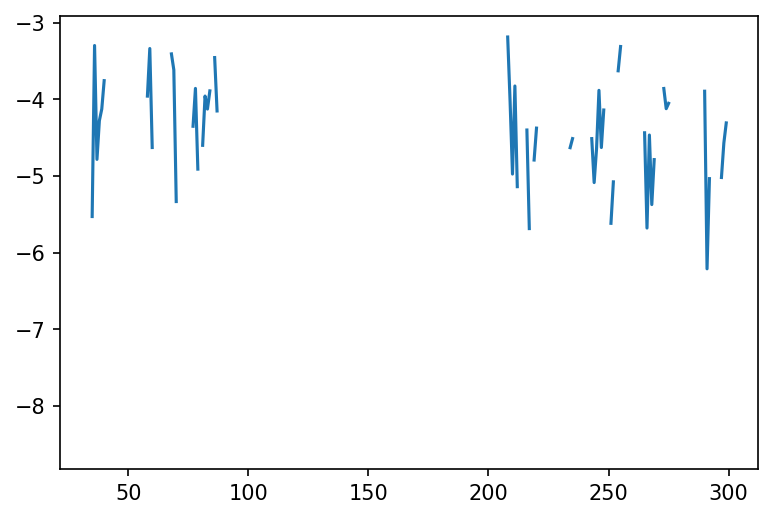

In [11]:
log_transform = np.log(df.iloc[7])
X = range(len(df.iloc[7]))

plt.figure(dpi=150)
plt.plot(X, log_transform)

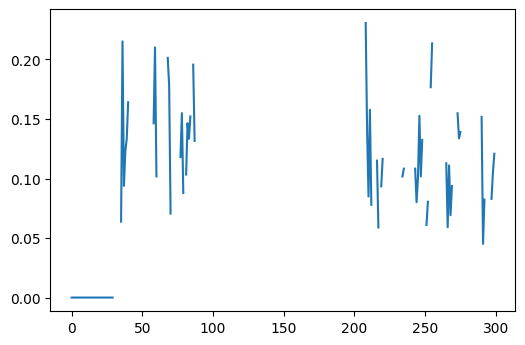

In [8]:
sqrt_transform = np.sqrt(df.iloc[7])

plt.figure(dpi=100)
plt.plot(X, sqrt_transform)

In [9]:
sqrt_transform

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
295    0.129898
296         NaN
297    0.082914
298    0.105010
299    0.120845
Name: 7, Length: 300, dtype: float64

In [11]:
df = call_class.read_noisy_extra_param()

./Example_data/noisy_train/0100_01_01.txt


In [12]:
df

,0100_01_01
star_temp,4880.00000
star_logg,4.50000
star_rad,0.73000
star_mass,0.77000
star_k_mag,9.68800
period,6.67202


In [18]:
test = np.where(df["0001_01_01"] == df["0052_01_01"], True, False)

In [20]:
assert True in test

AssertionError: 

In [8]:
col_groups = df.columns.str.extract('(.+)Orig_[x|y]')[0]
col_groups

0    NaN
1    NaN
2    NaN
Name: 0, dtype: object

In [11]:
df1 = df.filter(like='_').groupby(lambda x: x.split('_')[0], axis=1).sum()

In [12]:
df1

,0001,0052,0100
star_temp,3667.4200,4997.000000,4880.00000
star_logg,5.0000,4.500000,4.50000
star_rad,0.4395,0.760000,0.73000
star_mass,0.4760,0.762933,0.77000
star_k_mag,9.4290,12.186000,9.68800
period,5.7071,13.767102,6.67202


In [13]:
df1 /= 10

In [17]:
for i in df1.keys():
    print(i)

0001
0052
0100
